In [70]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

#Scaling
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score



In [71]:
! pip install openpyxl

In [72]:
path = Path(r'Date_Fruit_Datasets.xlsx')
date = pd.read_excel(path)

In [73]:
date

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [74]:
date.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [75]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [76]:
class_group = date.groupby(by='Class').mean()
class_group

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
Class,,,,,,,,,,,,,,,,,,,,,
BERHI,405213.446154,2321.504669,815.370329,634.656000,0.621369,716.904234,0.993957,407666.153846,0.766549,1.288515,...,1.237302,3.805326,5.732585,6.671926,-4.139439e+10,-3.796279e+10,-3.325089e+10,49.352677,48.263368,44.324366
DEGLET,233743.357143,1831.441983,680.222427,440.273151,0.756589,543.476547,0.984319,237428.908163,0.760827,1.550036,...,-0.222301,2.644296,2.642760,2.742700,-3.555533e+10,-3.061273e+10,-2.876142e+10,59.580324,55.605459,54.638908
DOKOL,145147.421569,1436.321190,537.843773,342.949578,0.763276,427.546873,0.987206,147026.990196,0.755143,1.565859,...,-0.142743,3.070927,3.051433,2.751065,-2.370817e+10,-2.213381e+10,-1.897899e+10,61.817167,60.260382,56.393073
IRAQI,433983.583333,2411.046333,836.104518,664.326222,0.595040,742.701772,0.993076,436990.513889,0.763890,1.261814,...,1.072739,5.975488,7.677246,6.215456,-2.909566e+10,-3.064288e+10,-3.057680e+10,40.237440,41.758233,41.056210
ROTANA,387115.867470,2376.310050,832.475543,599.880924,0.686942,701.009730,0.980255,394846.084337,0.736674,1.391999,...,-0.172949,2.763720,2.769380,2.903195,-6.212994e+10,-5.455981e+10,-5.089050e+10,61.717520,58.280622,56.329015
SAFAVI,334367.783920,2329.186030,881.385573,488.488877,0.826394,650.104639,0.973426,343399.924623,0.686883,4.483646,...,0.626492,7.819265,10.384683,4.684819,-9.085305e+09,-1.099945e+10,-1.459300e+10,25.676704,29.007776,33.765713
SOGAY,286872.957447,2051.277354,755.978483,492.676919,0.751864,602.329610,0.971239,295203.734043,0.731430,1.536905,...,0.236660,2.516620,2.728207,2.871002,-3.588859e+10,-2.791138e+10,-2.645158e+10,53.883697,47.810700,47.089709


# Exploratory Data Analysis

<AxesSubplot:xlabel='AREA', ylabel='PERIMETER'>

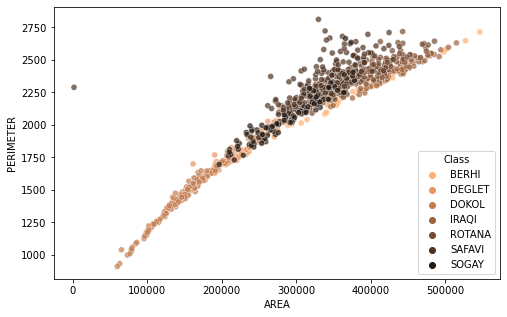

In [77]:
plt.figure(figsize=[8, 5])
sns.scatterplot(data=date,
            y='PERIMETER',
            x='AREA',
            hue='Class',
            alpha=0.7,
            palette='copper_r' 
)


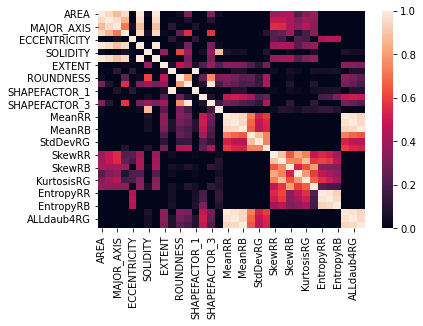

In [78]:
ax = sns.heatmap(date.corr(), vmin=0, vmax=1)

<AxesSubplot:xlabel='Class', ylabel='AREA'>

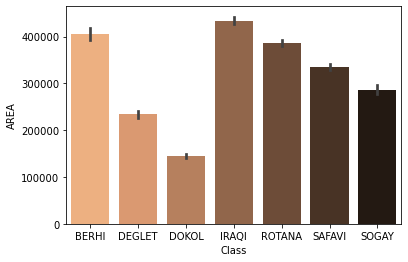

In [79]:
sns.barplot(x='Class', y='AREA', data=date, palette='copper_r')

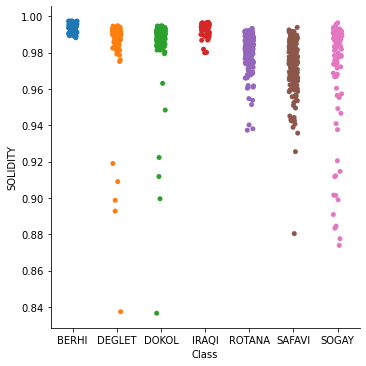

In [80]:
sns.catplot(x='Class', y='SOLIDITY', data=date)

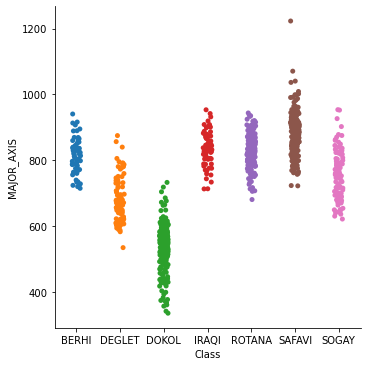

In [81]:
sns.catplot(x='Class', y='MAJOR_AXIS', data=date)

# Feature Selection

In [82]:
date = date[date['SOLIDITY'] > 0.93]

In [83]:
date = date[date['MAJOR_AXIS'] < 1000]

In [84]:
feature = date.drop('Class', axis=1)
label = date['Class']

In [85]:
todrop = ['EXTENT','COMPACTNESS','StdDevRR','EntropyRG','KurtosisRB','ECCENTRICITY','MeanRB','SkewRR',
           'ASPECT_RATIO','SOLIDITY','SHAPEFACTOR_3','SHAPEFACTOR_4','KurtosisRR']

In [86]:
feature.drop(todrop, axis=1, inplace=True)

In [87]:
label = np.array(label)

# Model Building

In [88]:
scaler = StandardScaler()
scaler.fit(feature)
scaled = scaler.transform(feature)
X = scaled
y = label

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [90]:
model = RandomForestClassifier(n_estimators=70, max_features='auto', max_depth=10, n_jobs=-1)

bc = BaggingClassifier(base_estimator=model, 
            n_estimators=200,
            oob_score=True,
            random_state=1)

In [91]:
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                        n_estimators=70,
                                                        n_jobs=-1),
                  n_estimators=200, oob_score=True, random_state=1)

# Evaluating Models

In [92]:
y_pred = bc.predict(X_test)
accuracy_score(y_test, y_pred)
bc.oob_score_

0.8711340206185567

In [93]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

clf.predict_proba(X_test[:1])

print(clf.predict(X_test[:5, :]))

In [102]:
print(clf.score(X_test, y_test))

0.9513888888888888
